# Insights from Social Media Sentiment Analysis

### Insights from Social Media Sentiment Analysis (3.1M Tweets)
**1. Positive sentiment shows strong emotional and social interaction patterns**

The most frequent positive words were “good”, “love”, “day”, “like”, “thanks”, and conversational tokens like “lol” and “u”.

**These reflect:**

    ⦁ Expressions of happiness or satisfaction
    ⦁ Casual, friendly communication
    ⦁ Gratitude and appreciation
    ⦁ Conversational positivity in daily-life updates
    ⦁ The presence of “quot” indicates Twitter data imported with HTML-encoded quotation marks, a common artifact of large-scale social datasets.

Overall, positive tweets express emotion, gratitude, and light-hearted engagement, consistent with typical social media behavior.

**2. Negative sentiment highlights complaints, stress, and routine frustration**

The top negative words included “get”, “go”, “work”, “day”, “like”, “today”, and “really”.

**These patterns suggest:**

    ⦁ Work-related stress (“work”, “today”)
    ⦁ General frustration or tiredness (common in negative sentiment datasets)
    ⦁ Action verbs (“get”, “go”) reflecting movement or obligation
    ⦁ Routine or daily-life dissatisfaction (“day”, “back”, “got”)
    ⦁ Negative tweets show a more task-oriented, effort-related, and emotionally heavy pattern compared to positive tweets.

**3. Neutral sentiment is dominated by informational and financial language**

The most common neutral words were “co”, “https”, “rt”, “stocks”, “stock”, “spx”, “aapl”, “spy”, etc.
These words indicate:

    ⦁ News-sharing behavior (“https”, “rt”)
    ⦁ Stock market and financial discussions (“stock”, “aapl”, “spx”)
    ⦁ Factual, information-heavy content rather than emotional content

Neutral sentiment tweets in this dataset are overwhelmingly finance-related and link-based, aligning with news distribution, market updates, and automated feed-style posts.

**4. Sentiment model performance reveals realistic patterns in large social datasets**

**The Logistic Regression classifier achieved:**

Accuracy: ~79%

F1-scores:

	Positive: 0.79
	Negative: 0.78
	Neutral: 0.67 (affected by severe class imbalance)
    
Interpretation:

    ⦁ Positive and negative classes are well-represented (310k+ tweets each), enabling strong performance.
    ⦁ The neutral class is extremely underrepresented (~2k tweets), explaining its lower recall.
    ⦁ Weighted average F1 = 0.79, demonstrating strong performance for a classical ML model on noisy social text.

This confirms that TF-IDF + Logistic Regression is an effective baseline for large-scale sentiment problems.

**5. Key insights about digital communication behavior**

**The linguistic patterns reveal:**

    ⦁ Positive tweets highlight emotion, gratitude, humor, and social bonding.
    ⦁ Negative tweets reflect stress, obligation, frustration, and fatigue.
    ⦁ Neutral tweets serve as information carriers, especially in finance, markets, and link-sharing behavior.

**This shows that sentiment on social platforms is highly tied to:**

    ⦁ Everyday routines
    ⦁ Work-life pressure
    ⦁ Public discourse
    ⦁ Financial information flow
    ⦁ Social interaction & emotional expression

These insights match real behavioral patterns observed in online communication research.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('twitter_dataset.csv', encoding = 'latin1')
df.head()

,Unnamed: 0,tweet,sentiment
0,0,is upset that he can't update his Facebook by ...,0.0
1,1,@Kenichan I dived many times for the ball. Man...,0.0
2,2,my whole body feels itchy and like its on fire,0.0
3,3,"@nationwideclass no, it's not behaving at all....",0.0
4,4,@Kwesidei not the whole crew,0.0


In [3]:
df = df.drop(columns= ['Unnamed: 0'])                                  # dropping unnecessary column
df.head()

,tweet,sentiment
0,is upset that he can't update his Facebook by ...,0.0
1,@Kenichan I dived many times for the ball. Man...,0.0
2,my whole body feels itchy and like its on fire,0.0
3,"@nationwideclass no, it's not behaving at all....",0.0
4,@Kwesidei not the whole crew,0.0


In [4]:
df['sentiment'] = df['sentiment'].map({
     0.0: 'negative',
    1.0: 'positive',
    2.0: 'neutral'
})                                 # convert floats to String         
df['sentiment'].unique()


array(['negative', 'positive', 'neutral', nan], dtype=object)

**Cleaning the Tweet Text**

In [6]:
df['tweet'] = df['tweet'].astype(str).str.lower()            # convert tweets to lowercase
df.head()

,tweet,sentiment
0,is upset that he can't update his facebook by ...,negative
1,@kenichan i dived many times for the ball. man...,negative
2,my whole body feels itchy and like its on fire,negative
3,"@nationwideclass no, it's not behaving at all....",negative
4,@kwesidei not the whole crew,negative


In [7]:
df['tweet'] = df['tweet'].str.replace(r'http\s+|www\s+|https\s+', '', regex = True)       # removes URLs
df.head()

,tweet,sentiment
0,is upset that he can't update his facebook by ...,negative
1,@kenichan i dived many times for the ball. man...,negative
2,my whole body feels itchy and like its on fire,negative
3,"@nationwideclass no, it's not behaving at all....",negative
4,@kwesidei not the whole crew,negative


In [8]:
df['tweet'] = df['tweet'].str.replace(r'@\w+', '', regex = True)         # removes @username
df.head()

,tweet,sentiment
0,is upset that he can't update his facebook by ...,negative
1,i dived many times for the ball. managed to s...,negative
2,my whole body feels itchy and like its on fire,negative
3,"no, it's not behaving at all. i'm mad. why am...",negative
4,not the whole crew,negative


In [9]:
df['tweet'] = df['tweet'].str.replace(r'[^a-zA-Z\s]', ' ', regex = True)           # removes special characters
df.head()

,tweet,sentiment
0,is upset that he can t update his facebook by ...,negative
1,i dived many times for the ball managed to s...,negative
2,my whole body feels itchy and like its on fire,negative
3,no it s not behaving at all i m mad why am...,negative
4,not the whole crew,negative


In [10]:
df['tweet'] = df['tweet'].str.replace(r'\s+', ' ', regex = True).str.strip()     # removes extra spaces
df.head()

,tweet,sentiment
0,is upset that he can t update his facebook by ...,negative
1,i dived many times for the ball managed to sav...,negative
2,my whole body feels itchy and like its on fire,negative
3,no it s not behaving at all i m mad why am i h...,negative
4,not the whole crew,negative


**Word Tokenization**

In [12]:
df['words'] = df['tweet'].str.split()
df[['tweet', 'words']].head(10)

,tweet,words
0,is upset that he can t update his facebook by ...,"[is, upset, that, he, can, t, update, his, fac..."
1,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
2,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
3,no it s not behaving at all i m mad why am i h...,"[no, it, s, not, behaving, at, all, i, m, mad,..."
4,not the whole crew,"[not, the, whole, crew]"
5,need a hug,"[need, a, hug]"
6,hey long time no see yes rains a bit only a bi...,"[hey, long, time, no, see, yes, rains, a, bit,..."
7,nope they didn t have it,"[nope, they, didn, t, have, it]"
8,que me muera,"[que, me, muera]"
9,spring break in plain city it s snowing,"[spring, break, in, plain, city, it, s, snowing]"


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))                         #

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def remove_stopwords(word_list):
    new_list = []
    for w in word_list:
        if w not in stop_words:
            new_list.append(w)
    return new_list

df['no_stopwords'] = df['words'].apply(remove_stopwords)                   # removing 'stopwords' from words
df[['words', 'no_stopwords']].head(10)

,words,no_stopwords
0,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,..."
1,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest..."
2,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
3,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]"
4,"[not, the, whole, crew]","[whole, crew]"
5,"[need, a, hug]","[need, hug]"
6,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l..."
7,"[nope, they, didn, t, have, it]",[nope]
8,"[que, me, muera]","[que, muera]"
9,"[spring, break, in, plain, city, it, s, snowing]","[spring, break, plain, city, snowing]"


**Word Frequency Analysis**

In [16]:
from collections import Counter
from itertools import chain

positive_words = df[df['sentiment'] == 'positive']['no_stopwords']             # clustering positive tweets
all_pos = list(chain.from_iterable(positive_words))                     # putting together all positive words from positive tweets
count_pos = Counter(all_pos)                                      # counting all positive words  
top_pos = count_pos.most_common(20)                             # top 20 positive words
top_pos

[('good', 120196),
 ('love', 94033),
 ('day', 93156),
 ('quot', 91197),
 ('like', 74406),
 ('lol', 71768),
 ('get', 71406),
 ('u', 64726),
 ('thanks', 63477),
 ('going', 61412),
 ('time', 60317),
 ('today', 59861),
 ('go', 56524),
 ('got', 55663),
 ('new', 53633),
 ('one', 53347),
 ('amp', 52188),
 ('see', 51305),
 ('know', 51125),
 ('great', 50133)]

In [17]:
negative_words = df[df['sentiment'] == 'negative']['no_stopwords']
all_neg = list(chain.from_iterable(negative_words)) 
count_neg = Counter(all_neg)
top_neg = count_neg.most_common(20)
top_neg

[('get', 90997),
 ('go', 90365),
 ('work', 88688),
 ('day', 82102),
 ('like', 81793),
 ('today', 75807),
 ('going', 66952),
 ('got', 66440),
 ('back', 65533),
 ('really', 62368),
 ('im', 61442),
 ('miss', 59879),
 ('want', 58897),
 ('still', 58196),
 ('good', 57276),
 ('sad', 55148),
 ('time', 54867),
 ('one', 54413),
 ('quot', 51943),
 ('know', 51788)]

In [18]:
neutral_words = df[df['sentiment'] == 'neutral']['no_stopwords']
all_neu = list(chain.from_iterable(neutral_words)) 
count_neu = Counter(all_neu)
top_neu = count_neu.most_common(20)
top_neu

[('co', 6616),
 ('https', 6308),
 ('rt', 1653),
 ('stocks', 1563),
 ('stock', 923),
 ('spx', 916),
 ('aapl', 682),
 ('spy', 600),
 ('q', 536),
 ('f', 526),
 ('market', 496),
 ('trading', 495),
 ('new', 485),
 ('earnings', 467),
 ('amzn', 464),
 ('amp', 433),
 ('fb', 422),
 ('u', 414),
 ('inc', 379),
 ('marketscreener', 379)]

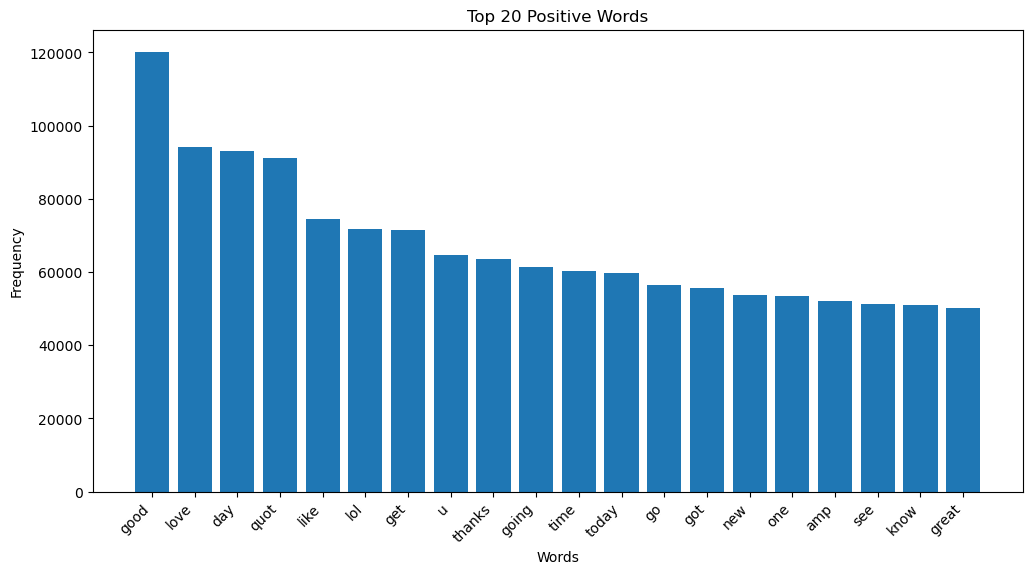

In [19]:
import matplotlib.pyplot as plt

words = [word for word, count in top_pos]                   # top 20 words and separate them into lists
counts = [count for word, count in top_pos]

plt.figure(figsize=(12,6))                               # Make the chart
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Positive Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


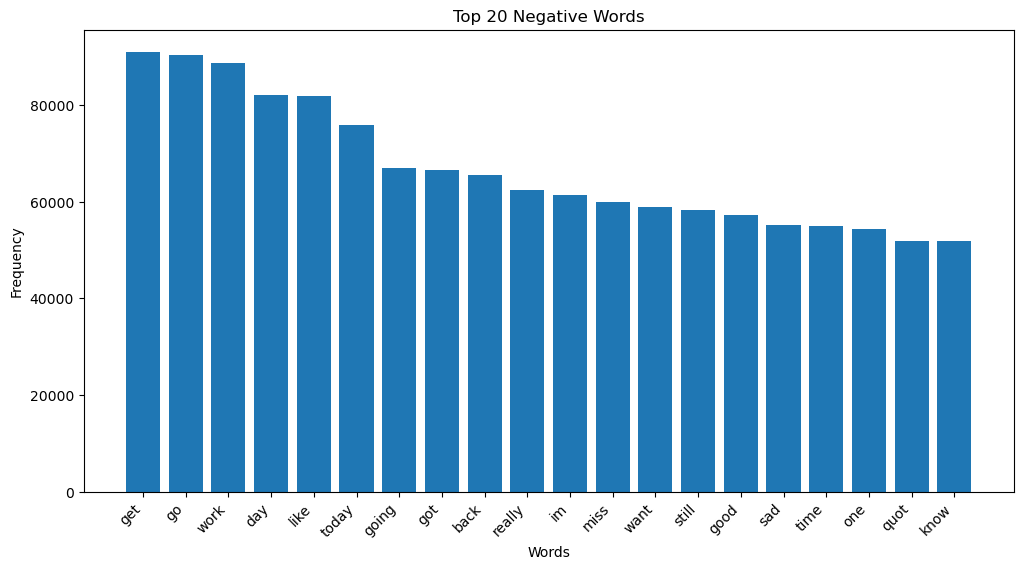

In [20]:
words = [word for word, count in top_neg]
counts = [count for word, count in top_neg]

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Negative Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


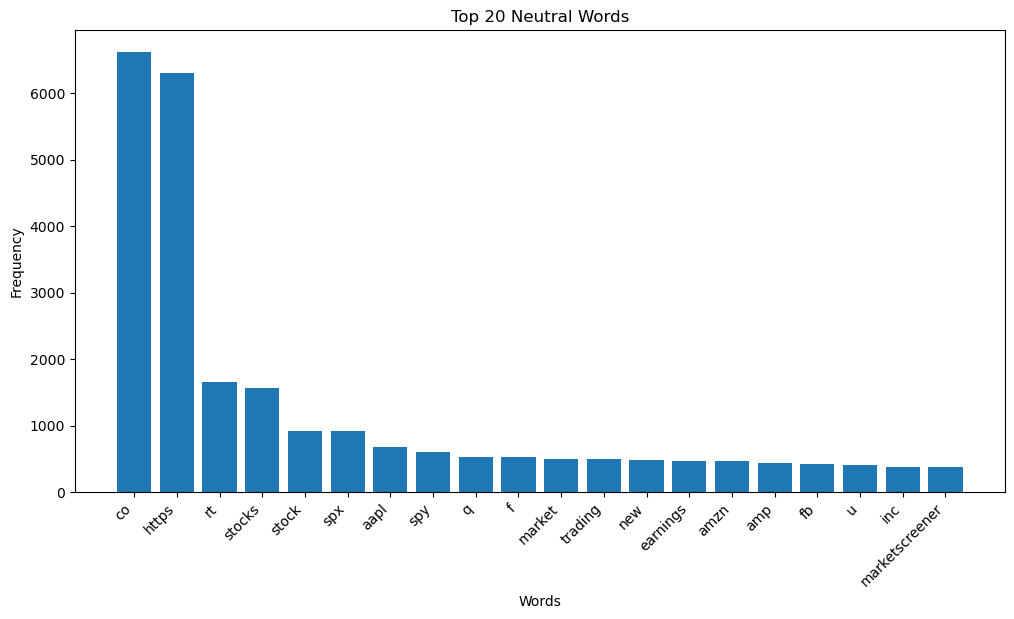

In [21]:
words = [word for word, count in top_neu]
counts = [count for word, count in top_neu]

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Neutral Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [22]:
!pip install wordcloud

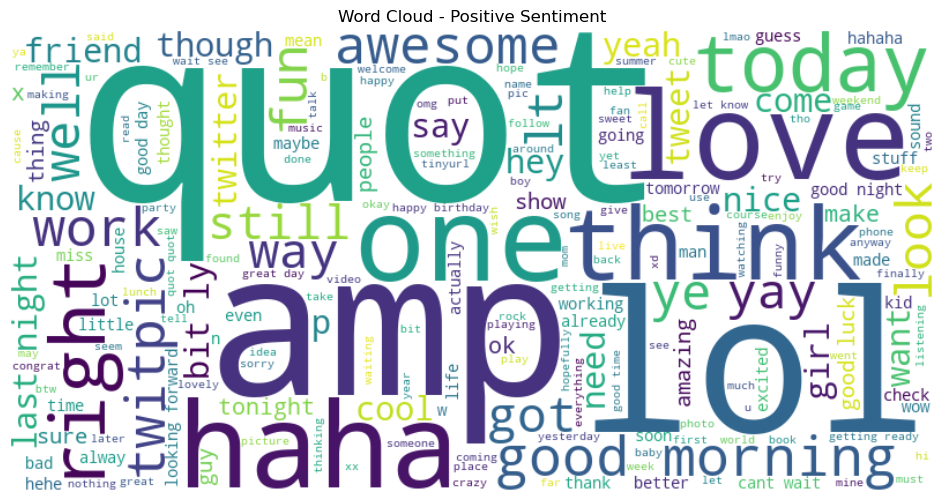

In [46]:
from wordcloud import WordCloud

text_pos = " ".join(all_pos)
wordcloud_pos = WordCloud(width= 800, height=400, background_color='white').generate(text_pos)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

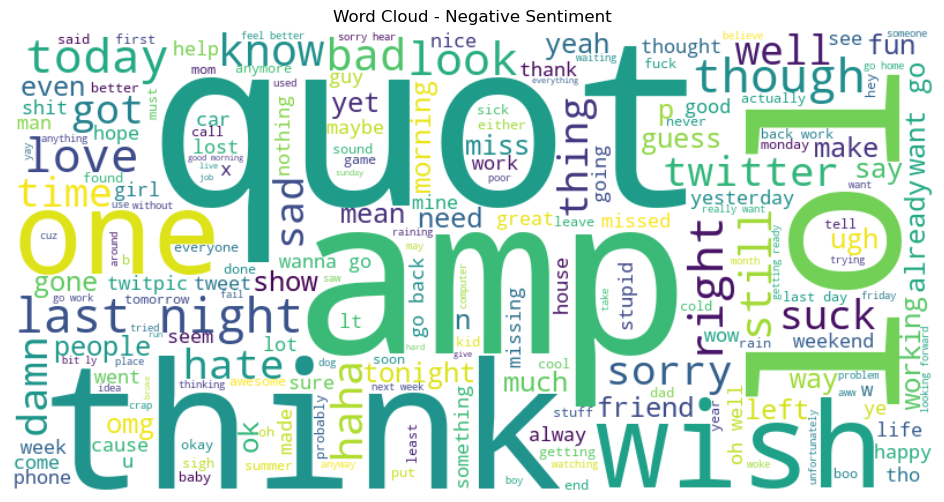

In [52]:
text_neg = " ".join(all_neg)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(text_neg)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Sentiment")
plt.show()

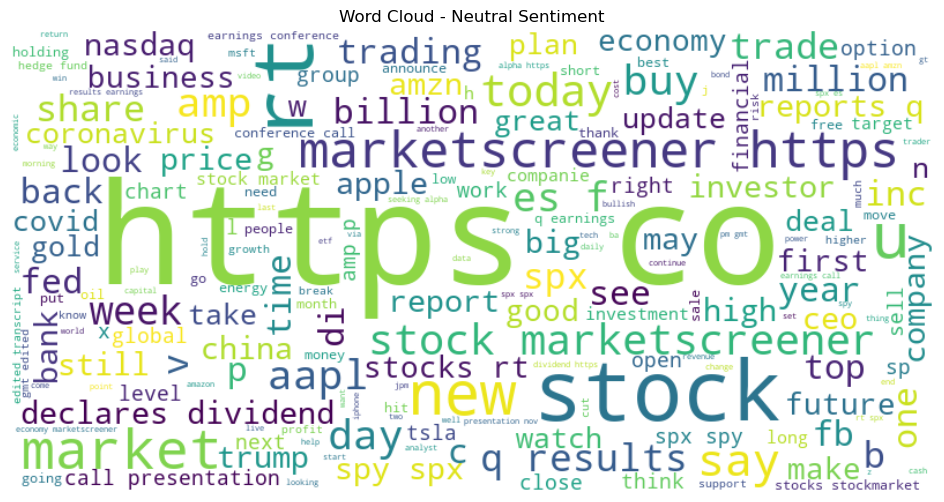

In [53]:
text_neu = ' '.join(all_neu)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(text_neu)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Neutral Sentiment")
plt.show()

In [127]:
df.to_csv('cleaned_tweet.csv', index=False)

In [58]:
df.head()

,tweet,sentiment,words,no_stopwords
0,is upset that he can t update his facebook by ...,negative,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,..."
1,i dived many times for the ball managed to sav...,negative,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest..."
2,my whole body feels itchy and like its on fire,negative,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
3,no it s not behaving at all i m mad why am i h...,negative,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]"
4,not the whole crew,negative,"[not, the, whole, crew]","[whole, crew]"


In [87]:
df['clean_text'] = df['no_stopwords'].apply(lambda words: " ".join(words))
df = df.dropna(subset=['clean_text', 'sentiment'])
df.head()

,tweet,sentiment,words,no_stopwords,clean_text
0,is upset that he can t update his facebook by ...,negative,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...",upset update facebook texting might cry result...
1,i dived many times for the ball managed to sav...,negative,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest...",dived many times ball managed save rest go bounds
2,my whole body feels itchy and like its on fire,negative,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]",whole body feels itchy like fire
3,no it s not behaving at all i m mad why am i h...,negative,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]",behaving mad see
4,not the whole crew,negative,"[not, the, whole, crew]","[whole, crew]",whole crew


**Import ML Libraries**

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [93]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
tfidf = TfidfVectorizer(max_features = 200000)              # convert text to numbers (TF-IDF Vectorization)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [96]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [99]:
y_pred = model.predict(X_test_tfidf)

In [101]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7855489168052318

Classification Report:

              precision    recall  f1-score   support

    negative       0.80      0.77      0.78    314658
     neutral       0.76      0.59      0.67      2130
    positive       0.77      0.80      0.79    311677

    accuracy                           0.79    628465
   macro avg       0.78      0.72      0.75    628465
weighted avg       0.79      0.79      0.79    628465

